In [65]:
# 1. Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import Counter

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 📂 Función para Leer Datos

Creamos funciones para leer los datasets generados desde los archivos CSV.

In [68]:
def leer_dataset(cantidad, tipo='distorsionadas'):
    """
    Lee un dataset desde archivo CSV.
    
    Args:
        cantidad: 100, 500 o 1000
        tipo: 'originales' o 'distorsionadas'
    
    Returns:
        X: Patrones (numpy array de shape (n, 100))
        y: Etiquetas one-hot (numpy array de shape (n, 3))
        df: DataFrame completo
    """
    # Ruta al archivo
    file_path = os.path.join('data', tipo, str(cantidad), 'letras.csv')
    
    # Leer CSV
    df = pd.read_csv(file_path, sep=';', header=None)
    
    # Separar patrones y etiquetas
    X = df.iloc[:, :100].values  # Primeras 100 columnas (patrón)
    y = df.iloc[:, 100:].values  # Últimas 3 columnas (etiqueta)
    
    print(f"✅ Dataset cargado: {cantidad} ejemplos ({tipo})")
    print(f"   - Shape X: {X.shape}")
    print(f"   - Shape y: {y.shape}")
    
    return X, y, df

# Probar la función
X_100, y_100, df_100 = leer_dataset(100, 'distorsionadas')

✅ Dataset cargado: 100 ejemplos (distorsionadas)
   - Shape X: (98, 100)
   - Shape y: (98, 3)


## 📊 Explorar Estructura de los Datos

In [71]:
# Ver información del DataFrame
print("📋 Información del dataset:")
print(f"   - Total de filas: {len(df_100)}")
print(f"   - Total de columnas: {len(df_100.columns)}")
print(f"   - Primeras 100 columnas: Patrón de la letra (10x10 = 100 píxeles)")
print(f"   - Últimas 3 columnas: Etiqueta one-hot [B, D, F]")

# Ver primeras filas
print("\n📝 Primeras 5 filas (solo primeras 10 columnas + etiquetas):")
print(df_100.iloc[:5, [0,1,2,3,4,5,6,7,8,9,100,101,102]])

📋 Información del dataset:
   - Total de filas: 98
   - Total de columnas: 103
   - Primeras 100 columnas: Patrón de la letra (10x10 = 100 píxeles)
   - Últimas 3 columnas: Etiqueta one-hot [B, D, F]

📝 Primeras 5 filas (solo primeras 10 columnas + etiquetas):
   0    1    2    3    4    5    6    7    8    9    100  101  102
0    0    1    0    0    0    0    0    1    0    0    0    0    1
1    0    0    0    0    1    0    0    0    1    0    0    0    1
2    0    0    0    0    0    0    0    0    0    0    0    0    1
3    0    0    0    0    0    0    0    0    0    0    0    0    1
4    0    0    0    0    0    0    0    0    0    0    1    0    0


## 👁️ Visualizar Patrones de Letras

## 📏 Calcular Porcentaje de Distorsión

Calculamos el porcentaje de distorsión comparando con los patrones originales.

In [75]:
def calcular_distorsion(patron_dist, patron_orig):
    """
    Calcula el porcentaje de distorsión entre dos patrones.
    
    Args:
        patron_dist: Patrón distorsionado (100 elementos)
        patron_orig: Patrón original (100 elementos)
    
    Returns:
        Porcentaje de píxeles diferentes
    """
    diferencias = np.sum(patron_dist != patron_orig)
    porcentaje = (diferencias / len(patron_dist)) * 100
    return porcentaje

def analizar_distorsion_dataset(X_dist, y_dist, X_orig, y_orig):
    """
    Analiza la distorsión de todo el dataset.
    
    Returns:
        DataFrame con análisis por cada patrón
    """
    distorsiones = []
    letras_map = {0: 'B', 1: 'D', 2: 'F'}
    
    for i in range(len(X_dist)):
        letra_idx = np.argmax(y_dist[i])
        letra = letras_map[letra_idx]
        
        # Buscar el patrón original correspondiente
        # Asumimos que los patrones están en el mismo orden por clase
        patron_orig = X_orig[i]
        patron_dist = X_dist[i]
        
        distorsion = calcular_distorsion(patron_dist, patron_orig)
        
        distorsiones.append({
            'Ejemplo': i + 1,
            'Letra': letra,
            'Distorsión (%)': round(distorsion, 2)
        })
    
    df_distorsiones = pd.DataFrame(distorsiones)
    return df_distorsiones

# Cargar originales
X_orig_100, y_orig_100, _ = leer_dataset(100, 'originales')

# Analizar distorsión
df_distorsion = analizar_distorsion_dataset(X_100, y_100, X_orig_100, y_orig_100)

print("📊 Análisis de Distorsión:")
print(df_distorsion.head(20))

print("\n📈 Estadísticas:")
print(f"   - Distorsión mínima: {df_distorsion['Distorsión (%)'].min():.2f}%")
print(f"   - Distorsión máxima: {df_distorsion['Distorsión (%)'].max():.2f}%")
print(f"   - Distorsión promedio: {df_distorsion['Distorsión (%)'].mean():.2f}%")
print(f"   - Desviación estándar: {df_distorsion['Distorsión (%)'].std():.2f}%")

✅ Dataset cargado: 100 ejemplos (originales)
   - Shape X: (100, 100)
   - Shape y: (100, 3)
📊 Análisis de Distorsión:
    Ejemplo Letra  Distorsión (%)
0         1     F            32.0
1         2     F            33.0
2         3     F            15.0
3         4     F            24.0
4         5     B            10.0
5         6     D            30.0
6         7     B            15.0
7         8     D             0.0
8         9     F            25.0
9        10     F            15.0
10       11     B            15.0
11       12     B            28.0
12       13     D            39.0
13       14     B            20.0
14       15     D            41.0
15       16     F            33.0
16       17     D            20.0
17       18     F            25.0
18       19     F            37.0
19       20     F            20.0

📈 Estadísticas:
   - Distorsión mínima: 0.00%
   - Distorsión máxima: 41.00%
   - Distorsión promedio: 22.47%
   - Desviación estándar: 10.18%


## 📊 Visualizar Distribución de Distorsiones

In [ ]:
# Histograma de distorsiones
plt.figure(figsize=(12, 5))

# Subplot 1: Histograma general
plt.subplot(1, 2, 1)
plt.hist(df_distorsion['Distorsión (%)'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Distorsión (%)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Distorsiones en el Dataset')
plt.grid(True, alpha=0.3)

# Subplot 2: Boxplot por letra
plt.subplot(1, 2, 2)
df_distorsion.boxplot(column='Distorsión (%)', by='Letra', ax=plt.gca())
plt.xlabel('Letra')
plt.ylabel('Distorsión (%)')
plt.title('Distorsión por Letra')
plt.suptitle('')  # Quitar título automático

plt.tight_layout()
plt.show()

# Tabla resumen por letra
print("\n📋 Resumen de Distorsión por Letra:")
resumen = df_distorsion.groupby('Letra')['Distorsión (%)'].agg(['count', 'mean', 'min', 'max', 'std'])
resumen.columns = ['Cantidad', 'Promedio', 'Mínimo', 'Máximo', 'Desv. Std']
print(resumen.round(2))

## 🔍 Ver Ejemplos con su Distorsión

In [ ]:
def visualizar_con_distorsion(X_dist, y_dist, X_orig, num_ejemplos=6):
    """
    Visualiza patrones mostrando el % de distorsión aplicado.
    """
    letras_map = {0: 'B', 1: 'D', 2: 'F'}
    
    num_ejemplos = min(num_ejemplos, len(X_dist))
    filas = 2
    cols = num_ejemplos // 2
    
    fig, axes = plt.subplots(filas, cols, figsize=(cols*3, filas*3))
    axes = axes.flatten()
    
    for i in range(num_ejemplos):
        # Calcular distorsión
        distorsion = calcular_distorsion(X_dist[i], X_orig[i])
        
        # Convertir patrón 1D a matriz 10x10
        patron = X_dist[i].reshape(10, 10)
        
        # Obtener letra
        letra_idx = np.argmax(y_dist[i])
        letra = letras_map[letra_idx]
        
        # Visualizar
        axes[i].imshow(patron, cmap='binary', interpolation='nearest')
        axes[i].set_title(f'Letra: {letra}\nDistorsión: {distorsion:.1f}%', fontweight='bold')
        axes[i].axis('off')
    
    plt.suptitle('Patrones con Porcentaje de Distorsión', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Visualizar ejemplos con distorsión
visualizar_con_distorsion(X_100, y_100, X_orig_100, num_ejemplos=6)

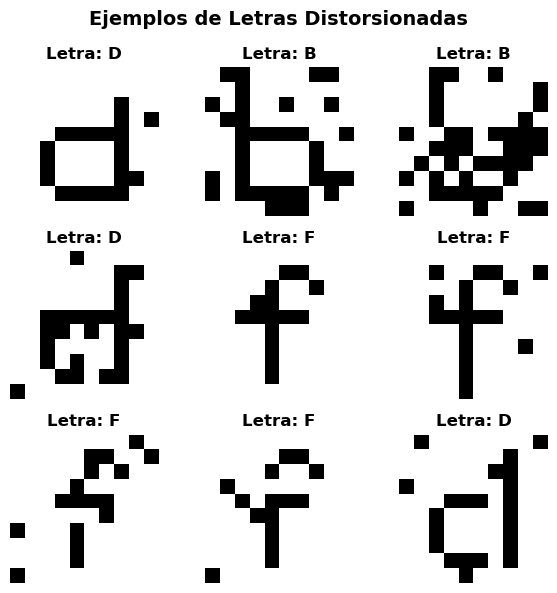

In [44]:
def visualizar_patrones(X, y, num_ejemplos=9, titulo="Ejemplos del Dataset"):
    """
    Visualiza múltiples patrones del dataset.
    
    Args:
        X: Array de patrones
        y: Array de etiquetas one-hot
        num_ejemplos: Número de ejemplos a mostrar
        titulo: Título del gráfico
    """
    letras_map = {0: 'B', 1: 'D', 2: 'F'}
    
    num_ejemplos = min(num_ejemplos, len(X))
    filas = int(np.sqrt(num_ejemplos))
    cols = int(np.ceil(num_ejemplos / filas))
    
    fig, axes = plt.subplots(filas, cols, figsize=(cols*2, filas*2))
    axes = axes.flatten() if num_ejemplos > 1 else [axes]
    
    for i in range(num_ejemplos):
        # Convertir patrón 1D a matriz 10x10
        patron = X[i].reshape(10, 10)
        
        # Obtener letra
        letra_idx = np.argmax(y[i])
        letra = letras_map[letra_idx]
        
        # Visualizar
        axes[i].imshow(patron, cmap='binary', interpolation='nearest')
        axes[i].set_title(f'Letra: {letra}', fontweight='bold')
        axes[i].axis('off')
    
    # Ocultar ejes vacíos
    for i in range(num_ejemplos, len(axes)):
        axes[i].axis('off')
    
    plt.suptitle(titulo, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Visualizar ejemplos
visualizar_patrones(X_100, y_100, num_ejemplos=9, titulo="Ejemplos de Letras Distorsionadas")

## 🔄 Comparar: Originales vs Distorsionadas

✅ Dataset cargado: 100 ejemplos (originales)
   - Shape X: (100, 100)
   - Shape y: (100, 3)


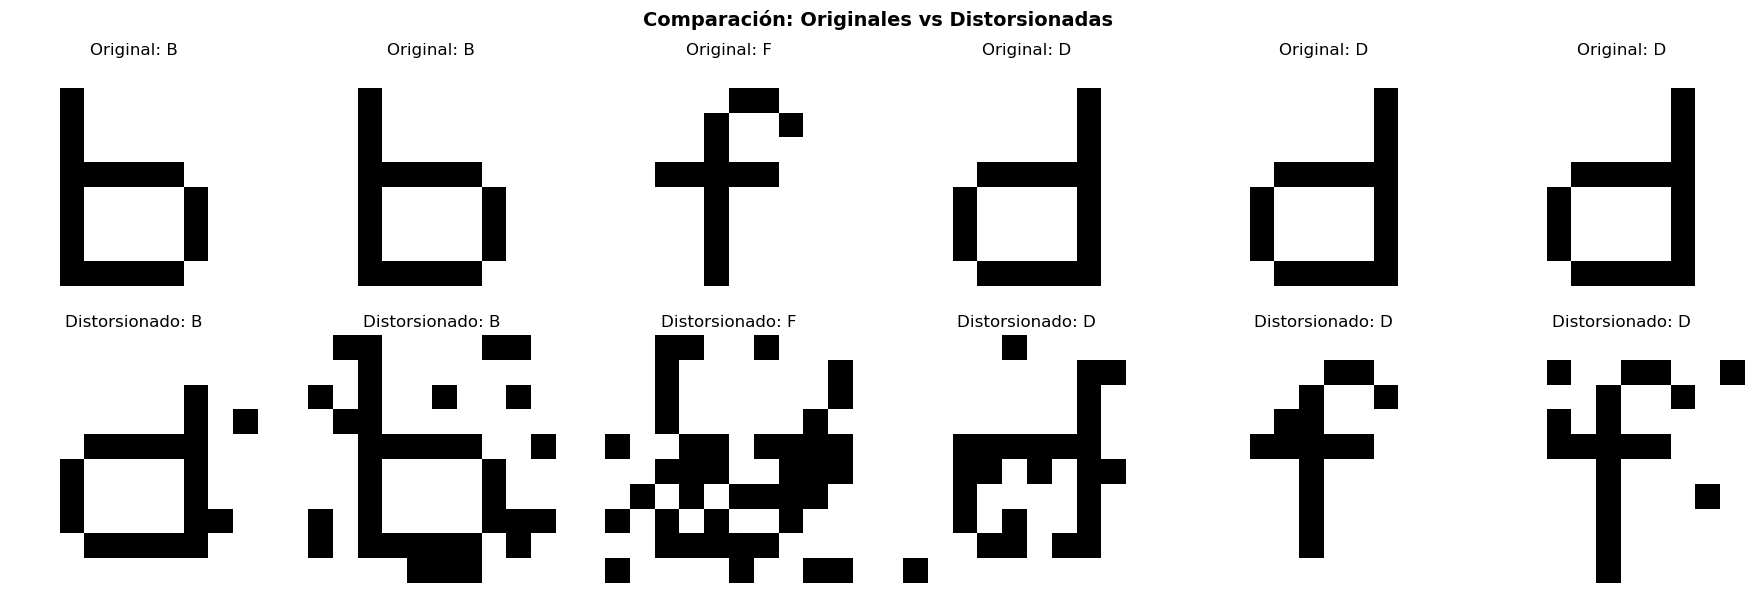

In [47]:
# Cargar datasets originales
X_orig, y_orig, df_orig = leer_dataset(100, 'originales')

# Comparar ejemplos
def comparar_originales_vs_distorsionadas(X_orig, y_orig, X_dist, y_dist, num_ejemplos=3):
    """Compara patrones originales vs distorsionados"""
    letras_map = {0: 'B', 1: 'D', 2: 'F'}
    
    fig, axes = plt.subplots(2, num_ejemplos, figsize=(num_ejemplos*3, 6))
    
    for i in range(num_ejemplos):
        # Original
        patron_orig = X_orig[i].reshape(10, 10)
        letra_idx = np.argmax(y_orig[i])
        letra = letras_map[letra_idx]
        
        axes[0, i].imshow(patron_orig, cmap='binary', interpolation='nearest')
        axes[0, i].set_title(f'Original: {letra}')
        axes[0, i].axis('off')
        
        # Distorsionado
        patron_dist = X_dist[i].reshape(10, 10)
        axes[1, i].imshow(patron_dist, cmap='binary', interpolation='nearest')
        axes[1, i].set_title(f'Distorsionado: {letra}')
        axes[1, i].axis('off')
    
    axes[0, 0].set_ylabel('Originales', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Distorsionadas', fontsize=12, fontweight='bold')
    
    plt.suptitle('Comparación: Originales vs Distorsionadas', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

comparar_originales_vs_distorsionadas(X_orig, y_orig, X_100, y_100, num_ejemplos=6)

## 📈 Cargar y Comparar Todos los Datasets

In [18]:
# Cargar todos los datasets
datasets = {}

for cantidad in [100, 500, 1000]:
    X, y, df = leer_dataset(cantidad, 'distorsionadas')
    datasets[cantidad] = {'X': X, 'y': y, 'df': df}
    
print("\n📦 Datasets disponibles:")
for cantidad, data in datasets.items():
    print(f"   - {cantidad} ejemplos: X{data['X'].shape}, y{data['y'].shape}")

✅ Dataset cargado: 100 ejemplos (distorsionadas)
   - Shape X: (100, 100)
   - Shape y: (100, 3)
✅ Dataset cargado: 500 ejemplos (distorsionadas)
   - Shape X: (500, 100)
   - Shape y: (500, 3)
✅ Dataset cargado: 1000 ejemplos (distorsionadas)
   - Shape X: (1000, 100)
   - Shape y: (1000, 3)

📦 Datasets disponibles:
   - 100 ejemplos: X(100, 100), y(100, 3)
   - 500 ejemplos: X(500, 100), y(500, 3)
   - 1000 ejemplos: X(1000, 100), y(1000, 3)


## 🎯 Estadísticas de los Patrones

In [21]:
# Analizar estadísticas de los patrones
def analizar_estadisticas(X, nombre_dataset):
    """Analiza estadísticas de los patrones"""
    print(f"\n📊 Estadísticas de {nombre_dataset}:")
    print(f"   - Mínimo valor: {X.min()}")
    print(f"   - Máximo valor: {X.max()}")
    print(f"   - Media: {X.mean():.3f}")
    print(f"   - Píxeles activos promedio: {X.sum(axis=1).mean():.1f}")
    print(f"   - Desviación estándar: {X.std():.3f}")

# Analizar cada dataset
for cantidad, data in datasets.items():
    analizar_estadisticas(data['X'], f"Dataset {cantidad}")


📊 Estadísticas de Dataset 100:
   - Mínimo valor: 0
   - Máximo valor: 1
   - Media: 0.264
   - Píxeles activos promedio: 26.4
   - Desviación estándar: 0.441

📊 Estadísticas de Dataset 500:
   - Mínimo valor: 0
   - Máximo valor: 1
   - Media: 0.260
   - Píxeles activos promedio: 26.0
   - Desviación estándar: 0.439

📊 Estadísticas de Dataset 1000:
   - Mínimo valor: 0
   - Máximo valor: 1
   - Media: 0.263
   - Píxeles activos promedio: 26.3
   - Desviación estándar: 0.440


## 🎨 Visualizar Ejemplos de Cada Dataset

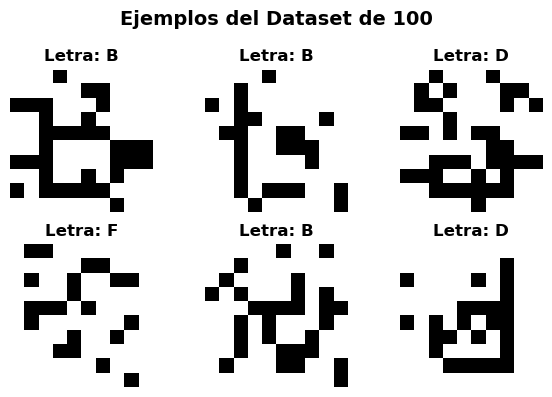

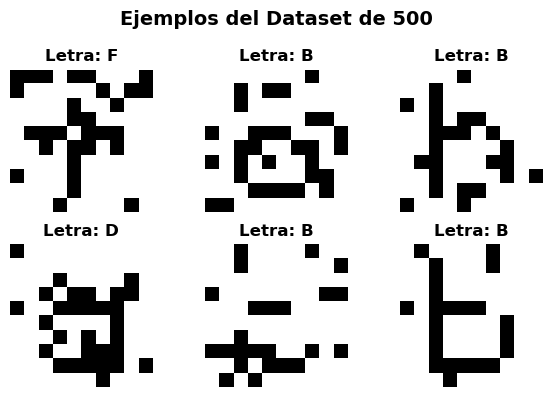

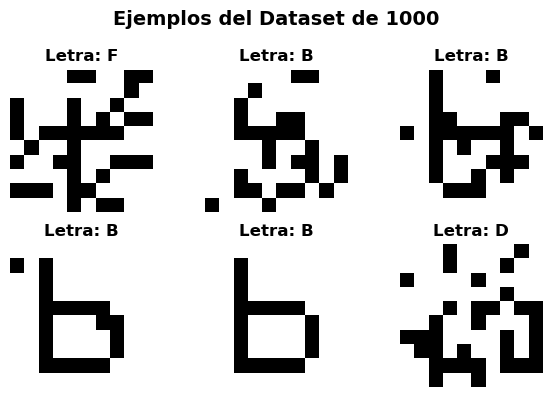

In [24]:
# Visualizar ejemplos de cada dataset
for cantidad, data in datasets.items():
    visualizar_patrones(
        data['X'], 
        data['y'], 
        num_ejemplos=6, 
        titulo=f"Ejemplos del Dataset de {cantidad}"
    )

## 🔍 Función Auxiliar: Buscar Letra Específica

🔎 Encontrados 34 ejemplos de la letra 'B'


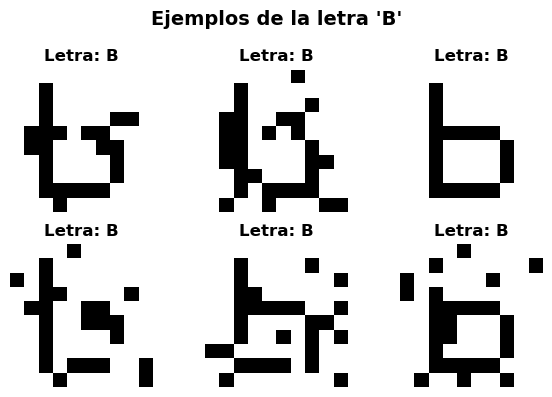

In [26]:
def buscar_letra(X, y, letra_buscada, num_ejemplos=6):
    """
    Busca y muestra ejemplos de una letra específica.
    
    Args:
        X: Patrones
        y: Etiquetas
        letra_buscada: 'B', 'D' o 'F'
        num_ejemplos: Número de ejemplos a mostrar
    """
    letras_map = {0: 'B', 1: 'D', 2: 'F'}
    letras_map_inv = {'B': 0, 'D': 1, 'F': 2}
    
    # Buscar índices de la letra
    idx_letra = letras_map_inv[letra_buscada]
    indices = np.where(np.argmax(y, axis=1) == idx_letra)[0]
    
    print(f"🔎 Encontrados {len(indices)} ejemplos de la letra '{letra_buscada}'")
    
    # Seleccionar ejemplos aleatorios
    if len(indices) > num_ejemplos:
        indices_seleccionados = np.random.choice(indices, num_ejemplos, replace=False)
    else:
        indices_seleccionados = indices
    
    # Visualizar
    visualizar_patrones(
        X[indices_seleccionados], 
        y[indices_seleccionados], 
        num_ejemplos=len(indices_seleccionados),
        titulo=f"Ejemplos de la letra '{letra_buscada}'"
    )

# Buscar ejemplos de la letra 'B'
buscar_letra(X_100, y_100, 'B', num_ejemplos=6)

## ✅ Resumen

**Funciones creadas:**
- `leer_dataset(cantidad, tipo)` - Lee datasets desde CSV
- `visualizar_patrones(X, y, num_ejemplos)` - Visualiza patrones
- `comparar_originales_vs_distorsionadas()` - Compara datasets
- `analizar_estadisticas(X, nombre)` - Analiza estadísticas
- `buscar_letra(X, y, letra)` - Busca letra específica

**Datasets disponibles:**
- 100, 500, 1000 ejemplos
- Originales y distorsionadas
- Formato: 103 columnas (100 píxeles + 3 clases)

¡Ahora puedes explorar y visualizar todos los datos generados! 🎉